# 降水插值

(200, 2) (200,) (50, 50)
[0.64688556 0.9780188  0.67821817 0.17176069 0.57140376 0.56784083
 0.14271054 0.16842596 0.01334844 0.59225766 0.98385996 0.72849695
 0.24283306 0.68354332 0.72867966 0.75466509 0.78405057 0.8024052
 0.60680445 0.52295463 0.77811558 0.50262942 0.81793357 0.01799791
 0.84860591 0.10821743 0.38092778 0.28984406 0.42163701 0.49838103
 0.96985667 0.9132473  0.85484657 0.72836128 0.4386121  0.96820121
 0.70150844 0.67887811 0.35040415 0.18916757 0.99590326 0.46261326
 0.28348013 0.52680999 0.75809558 0.18006829 0.45645006 0.86373931
 0.06404889 0.25539714 0.25122484 0.00310374 0.0997478  0.23395065
 0.6732755  0.88126798 0.97541144 0.09249646 0.45757432 0.07613718
 0.95051522 0.27448794 0.51644717 0.45272287 0.52513729 0.94722929
 0.72281651 0.70743036 0.69009088 0.69439541 0.36576728 0.94229721
 0.69839293 0.48955186 0.96005762 0.33503185 0.06036984 0.02710604
 0.58812711 0.54139424 0.51936673 0.86714242 0.56619118 0.25455953
 0.5754143  0.24211717 0.12195927 0.04

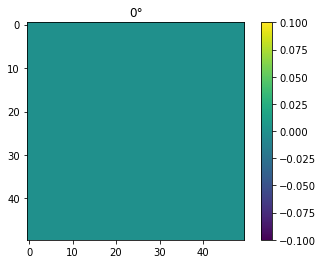

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
n=200
points = np.random.rand(n, 2)  # n是已知点个数
values = np.random.rand(n)  # 对应没每个点的值

# 插值的目标
# 注意，这里和普通使用数组的维度、下标不一样，是因为如果可视化的话，imshow坐标轴和一般的不一样
x, y = np.mgrid[
        1:20:50j,
        1:20:50j]
print(points.shape,values.shape,x.shape)
print(values)
# grid就是插值结果，你想要的到的区间的每个点数据都在这个grid矩阵里
grid = griddata(points, values, (x, y), method="linear", fill_value=0)

# 这里通过imshow显示时，坐标思维要按照计算机的来，普通图片是2维数组
# x 是最终结果的第一维，下标是从上到下由零增加
# y 是最终结果的第二维，下标是从左到右由零增加
plt.subplot(1, 1, 1)
plt.title("0°")
plt.imshow(grid)  # contourf jet gray
plt.colorbar()
plt.show()


(3050, 2) 3050 3050
516.2 0.0


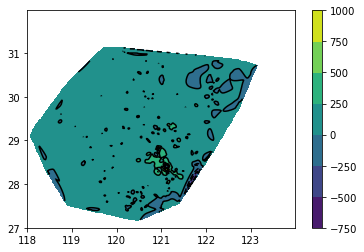

In [4]:
import pandas as pd
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import ceil, floor
%matplotlib inline


import numpy as np

import xarray as xr

import pandas as pd

import os

filepath = '/home/liyuan3970/3DVAR_retrive_radar_wind_from_typhoon1909/ncl/zdz/zdz_RR/RR_all_right.csv'

df = pd.read_csv(filepath,header=None)
#df

lat = list(df.iloc[:,1])
lon = list(df.iloc[:,2])
r = list(df.iloc[:,3])


#print(r)

N = len(r)


a = []
b = []
z = []

for i in range(N):
    if r[i]!=-9999.0:
        a.append(round(lon[i],2))
        b.append(round(lat[i],2))
        z.append(round(r[i],2))
    else:
        print(r[i])

lat = b
lon = a
r = z
Ni = len(r)
Zi = z
x = np.arange(118,124,0.02)
#print(x)
y = np.arange(27,32,0.02)
nx0 =len(x)
ny0 =len(y)
X, Y = np.meshgrid(x, y)#100*100
    #print(X.shape)
# x, y = np.mgrid[
#         118:124:200j,
#         27:32:200j]
P = np.array([X.flatten(), Y.flatten() ]).transpose()
    
Pi =  np.array([a, b ]).transpose()
#Z_linear = griddata(Pi, Zi,(x, y), method = "cubic")#.reshape([ny0,nx0])    
Z_linear = griddata(Pi, Zi, P, method = "cubic").reshape([ny0,nx0])
#print(Z_linear)
print(Pi.shape,len(Zi),Ni)
print(max(Zi),min(Zi))
#print(lon)
#plt.imshow(Z_linear) 
#print(Zi)
plt.contourf(X, Y, Z_linear)
#plt.contourf(X, Y, Z_linear)
plt.colorbar()
plt.contour(X, Y, Z_linear, colors = "k")
# #plt.triplot(Xi, Yi , tri.simplices.copy(), color = "k")
# #plt.plot(x0, y0, "or", label = "Data")
# #plt.legend()
# plt.grid()

In [ ]:
"/home/liyuan3970/Typhoon_LMQ/notebooks/RR_region.csv"

缺测： -9999.0
471.0 0.0


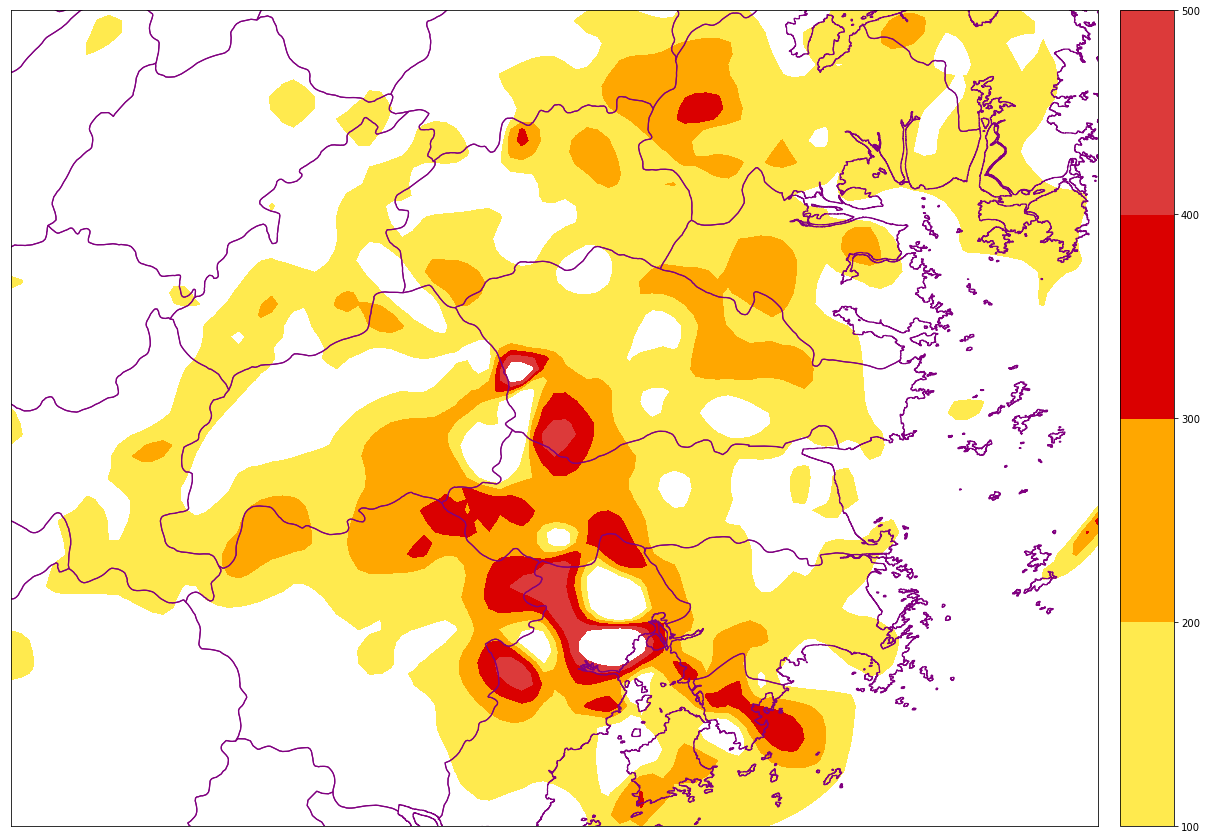

In [44]:
import pandas as pd
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import ceil, floor
%matplotlib inline

import cartopy.crs as ccrs
import numpy as np

import xarray as xr

import pandas as pd

import os

filepath = "/home/liyuan3970/Typhoon_LMQ/notebooks/RR_region.csv"

df = pd.read_csv(filepath,header=None)
#df

lat = list(df.iloc[:,1])
lon = list(df.iloc[:,2])
r = list(df.iloc[:,3])


#print(r)

N = len(r)


a = []
b = []
z = []

for i in range(N):
    if r[i]!=-9999.0:
        a.append(round(lon[i],2))
        b.append(round(lat[i],2))
        z.append(round(r[i],2))
    else:
        print("缺测：",r[i])

lat = b
lon = a
r = z
Ni = len(r)
Zi = z
x = np.arange(118,124,0.02)
#print(x)
y = np.arange(27,32,0.02)
nx0 =len(x)
ny0 =len(y)
X, Y = np.meshgrid(x, y)#100*100
    #print(X.shape)
# x, y = np.mgrid[
#         118:124:200j,
#         27:32:200j]
P = np.array([X.flatten(), Y.flatten() ]).transpose()
    
Pi =  np.array([a, b ]).transpose()
#Z_linear = griddata(Pi, Zi,(x, y), method = "cubic")#.reshape([ny0,nx0])    
#Z_linear = griddata(Pi, Zi, P, method = "linear").reshape([ny0,nx0])
Z_linear = griddata(Pi, Zi, P, method = "cubic").reshape([ny0,nx0])

# 数据平滑
from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel
from astropy.modeling.models import Gaussian2D
gauss_kernel = Gaussian2DKernel(2)
smoothed_data_gauss = convolve(Z_linear, gauss_kernel)


xrr =xr.DataArray(Z_linear, coords=[y, x], dims=['lat', 'lon'])

#xrr =xr.DataArray(smoothed_data_gauss, coords=[y, x], dims=['lat', 'lon'])







####################################################################################################################################


plt.figure(figsize=(25, 15))

from ncmaps import Cmaps

from matplotlib import cm
from ncmaps import Cmaps
from mpl_toolkits.basemap import Basemap

self_define_list = [130,144,155,170,185,200,225,235,240,244]

levels = [100,200,300,400,500]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()
m = Basemap(llcrnrlon=120,llcrnrlat=28.0,urcrnrlon=122.0,urcrnrlat=29.5)
fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang'
shade = m.contourf(X,Y,xrr,cmap=cmaps,levels=levels)
m.readshapefile(fname,'zhejiang',color='purple',linewidth=1.2)
m.colorbar(shade)
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines()
# xrr.plot()


#print(Z_linear)
# print(Pi.shape,len(Zi),Ni)
print(max(Zi),min(Zi))
# #print(lon)
# #plt.imshow(Z_linear) 
# #print(Zi)
# plt.contourf(X, Y, Z_linear)
# #plt.contourf(X, Y, Z_linear)
# plt.colorbar()
# plt.contour(X, Y, Z_linear, colors = "k")
# #plt.triplot(Xi, Yi , tri.simplices.copy(), color = "k")
# #plt.plot(x0, y0, "or", label = "Data")
# #plt.legend()
# plt.grid()

#  叠加地形